In [4]:
import pandas as pd
import numpy as np
import random
import math
import pickle

In [4]:
ls

0.0_weightmatrix.pkl  8.0_weightmatrix.pkl  P_11_f.csv
1.0_weightmatrix.pkl  9.0_weightmatrix.pkl  P_11_m.csv
2.0_weightmatrix.pkl  actual_11_new.csv     Part II.ipynb
3.0_weightmatrix.pkl  completegraph.py      Part I.ipynb
4.0_weightmatrix.pkl  Frames.csv            Proper.ipynb
5.0_weightmatrix.pkl  initial_marking.pkl   P_weightmatrix.pkl
6.0_weightmatrix.pkl  make_graph.py         random_mark.py
7.0_weightmatrix.pkl  P_11.csv              weight_maker.py


### Adjust DataFrame

In [22]:
df=pd.read_csv('P_11.csv')

In [23]:
df

,-0.1189,-0.25384,-3.0968,-4.4344,-3.773,-3.1575,-5.2104,-4.4293,-9.3364,-3.8661,...,-2.3361,-6.0485,-7.9394,-3.924,-6.2472,-2.8726,-7.194,-4.5858,-1.4494,0.72198
0,-1.050500,0.820150,-1.6931,-3.35290,-2.4966,-2.60960,-4.1757,-3.5307,-8.7476,-3.1979,...,-1.9994,-4.9315,-7.1239,-3.2989,-5.9739,-2.29410,-5.9265,-2.9785,-0.955880,0.866810
1,0.112490,-0.050571,-2.1697,-3.86450,-3.6207,-2.52020,-4.2300,-3.5475,-9.4687,-2.9095,...,-1.3565,-4.9324,-8.6748,-3.0456,-5.5742,-2.79590,-5.9022,-4.5185,-0.756460,0.915000
2,0.655230,0.820590,-2.8662,-3.90770,-3.9953,-2.61400,-4.1033,-4.3731,-10.5310,-3.4416,...,-2.9940,-6.9224,-8.9652,-3.6266,-6.1623,-2.65630,-7.5786,-5.4684,-0.861760,0.506260
3,1.193200,0.390900,-3.1467,-3.54740,-5.1273,-2.71730,-3.8956,-5.4280,-10.7390,-3.6881,...,-2.0629,-6.1501,-8.7820,-4.4415,-7.2686,-2.66890,-6.6098,-5.5405,-1.671400,0.907750
4,1.404300,1.120400,-3.7914,-3.04770,-4.0555,-2.10500,-2.7011,-4.2133,-9.7962,-3.3523,...,-1.9684,-5.3149,-8.5331,-3.1706,-6.2623,-2.34510,-5.6693,-4.6260,-0.994660,0.567260
5,0.579620,1.220900,-3.2761,-2.83970,-3.9473,-2.39380,-3.2859,-4.5689,-10.9870,-4.3845,...,-1.9320,-5.7421,-8.9531,-4.7008,-7.2706,-2.31110,-7.1063,-4.6350,-1.434500,0.400320
6,0.325500,1.291400,-2.7594,-2.83180,-3.2313,-2.20790,-3.1125,-4.1062,-10.6600,-3.6181,...,-1.2443,-5.6444,-8.1022,-4.9100,-7.2684,-2.42160,-6.7143,-4.6601,-1.391700,0.114810
7,0.245100,1.264500,-2.5035,-2.83030,-2.2319,-1.72960,-3.2670,-3.8236,-10.0540,-3.4190,...,-1.9289,-4.8692,-7.7686,-4.5939,-6.9851,-1.83940,-6.5950,-4.6534,-0.453860,-0.101260
8,0.709740,0.924520,-2.5639,-3.28150,-1.5752,-0.67769,-3.2436,-3.4460,-8.4705,-4.1067,...,-1.3587,-4.6033,-7.4815,-3.8112,-6.4422,-1.00190,-7.0226,-4.0094,-0.728520,-0.153550
9,0.443330,0.858270,-3.1060,-2.79820,-2.1461,-0.61989,-3.0929,-3.9249,-9.2125,-4.1105,...,-1.0900,-6.0206,-8.4344,-3.5412,-7.2017,-1.11680,-8.2332,-3.6690,-0.693670,-0.265930


In [24]:
df.values

array([[-1.0505  ,  0.82015 , -1.6931  , ..., -2.9785  , -0.95588 ,
         0.86681 ],
       [ 0.11249 , -0.050571, -2.1697  , ..., -4.5185  , -0.75646 ,
         0.915   ],
       [ 0.65523 ,  0.82059 , -2.8662  , ..., -5.4684  , -0.86176 ,
         0.50626 ],
       ...,
       [ 0.15619 , -1.8715  , -4.4743  , ..., -3.1766  , -0.2645  ,
        -0.28731 ],
       [-0.4947  , -1.3855  , -3.9176  , ..., -2.5809  , -0.43626 ,
        -0.14402 ],
       [-0.52148 , -1.3499  , -4.2698  , ..., -3.7877  , -0.49223 ,
        -0.13616 ]])

In [25]:
np.shape(df.values)

(14774, 4096)

In [26]:
col=[]
for x in df.columns:
    try:
        col+=[float(x)]
    except:
        col+=[float(x[:-2])]
#df.iloc[0]=col

In [27]:
col

[-0.1189,
 -0.25384,
 -3.0968,
 -4.4344,
 -3.773,
 -3.1575,
 -5.2104,
 -4.4293,
 -9.3364,
 -3.8661,
 -4.283,
 2.8957,
 -4.4618,
 -2.337,
 1.1423,
 1.8781,
 -4.4225,
 -7.1769,
 -2.9409,
 -2.5155,
 -4.2441,
 -0.93888,
 2.8267,
 -3.3441,
 -0.36594,
 -6.8274,
 -0.98525,
 -1.5857,
 -0.79615,
 -2.4486,
 -0.24206,
 -2.2341,
 -1.4774,
 -3.3164,
 -1.9965,
 -3.5948,
 -1.0481,
 -4.8588,
 -4.0181,
 1.8942,
 -2.5007,
 -1.9418,
 -0.7637,
 -1.0459,
 -2.7609,
 -4.4864,
 0.20521,
 -4.5463,
 -2.2213,
 -1.52,
 -2.5529,
 0.85059,
 -3.3604,
 1.6549,
 -3.6659,
 -4.6008,
 -0.75265,
 -4.1735,
 -2.9978,
 -2.3138,
 -3.9311,
 6.1338,
 0.18833,
 -0.39224,
 1.8102,
 -8.9083,
 4.0061,
 -3.7265,
 -2.0325,
 4.138,
 -2.5487,
 -4.8928,
 -8.4992,
 -4.2514,
 -2.9783,
 -5.3395,
 -4.7929,
 -1.8106,
 -6.4509,
 -4.9991,
 -7.1791,
 -0.99007,
 -2.7487,
 -3.6878,
 -4.5465,
 -1.0049,
 -6.2138,
 -2.3998,
 -3.9537,
 -1.1539,
 -4.4512,
 -3.3364,
 -3.6575,
 -0.67296,
 -2.5264,
 -6.9593,
 -4.8105,
 -3.1744,
 -2.6177,
 -1.1173,
 -2.99

In [28]:
L=df.values
L=np.insert(L,0,col,axis=0)

In [29]:
np.shape(L)

(14775, 4096)

In [30]:
df_=pd.DataFrame(L)

In [14]:
df_.to_csv('P_11_f.csv')

## Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()



df_ = scaler.fit_transform(df_)

In [32]:
np.shape(df_)

(14775, 4096)

In [33]:
df_

array([[0.55545907, 0.54373369, 0.45570651, ..., 0.40606118, 0.40784904,
        0.74326448],
       [0.4902164 , 0.6387157 , 0.55597223, ..., 0.51397132, 0.44846196,
        0.75424743],
       [0.57166398, 0.56171049, 0.52192888, ..., 0.41057953, 0.46487269,
        0.75790184],
       ...,
       [0.57472442, 0.40067036, 0.35731225, ..., 0.50067138, 0.50535723,
        0.66672658],
       [0.5291407 , 0.44365145, 0.3970771 , ..., 0.5406652 , 0.4912227 ,
        0.67759274],
       [0.52726521, 0.44679985, 0.3719196 , ..., 0.45964363, 0.4866168 ,
        0.67818879]])

##  initial seeding

In [34]:
fr=pd.read_csv('Frames.csv')

In [51]:
fr

,Action Label,Action,Index,Frames
0,23,using computer,30-1965,1935
1,30,putting on shoes/sucks,2337-2820,483
2,14,Drink water/bottle,2884-4871,1987
3,12,making tea,5359-9833,4474
4,23,using computer,9934-12539,2605
5,31,drinking coffee/tea,10966-11602,636
6,31,drinking coffee/tea,12545-12736,191
7,5,washing hands/face,13228-13803,575
8,6,drying hands/face,13815-14121,306
9,24,using cell,14272-14685,413


## Creating Original Array

In [52]:
org_array_=[0 for x in range(14775)]

In [54]:
for i in range(len(fr)):
    try:
        start,end=fr['Index'][i].split('-')
    except:
        print (i)
    for j in range(int(start),int(end)):
        org_array_[j]=fr['Action Label'][i]
    
    

In [55]:
org_array_

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,


## Creating Dictionary of Actions

In [35]:

d={}

count=1
for i in range(len(fr)):
    try:
        start,end=fr['Index'][i].split('-')
    except:
        print (i)
    times=int((int(end)-int(start))*0.05)
    l=[]
    for j in range(times):
        l+=[random.randint(int(start),int(end))]
    if fr['Action Label'][i] in d.keys():
        d[fr['Action Label'][i]]['values']+=l
    else:
        d[fr['Action Label'][i]]={'key':count,'values':l}
        count+=1




p=open("initial_marking.pkl","wb")
pickle.dump(d,p)

print (len(d))

8


In [36]:
np.shape(df_)

(14775, 4096)

In [37]:
d

{5: {'key': 6,
  'values': [13358,
   13663,
   13331,
   13770,
   13253,
   13343,
   13518,
   13789,
   13233,
   13614,
   13714,
   13724,
   13749,
   13534,
   13471,
   13571,
   13643,
   13557,
   13271,
   13279,
   13497,
   13698,
   13365,
   13510,
   13313,
   13742,
   13769,
   13544]},
 6: {'key': 7,
  'values': [13827,
   13835,
   14102,
   14002,
   13981,
   13945,
   14054,
   13848,
   13972,
   14068,
   13892,
   13816,
   14120,
   13964,
   13932]},
 12: {'key': 4,
  'values': [8329,
   5800,
   9389,
   8632,
   8011,
   8910,
   6038,
   5716,
   6310,
   8752,
   9270,
   6508,
   6945,
   7647,
   9687,
   5578,
   5496,
   6803,
   7139,
   9534,
   6240,
   8036,
   8153,
   9277,
   8248,
   7193,
   8182,
   6896,
   6330,
   5617,
   8729,
   9083,
   9119,
   5780,
   8318,
   6575,
   6437,
   7136,
   8900,
   5508,
   8027,
   9765,
   8657,
   7410,
   8718,
   8058,
   8164,
   7437,
   7547,
   6157,
   6901,
   9371,
   9094,
   7120,
   6

In [38]:
array_=[0 for x in range(14775)]

In [39]:
for i in d:
    for j in d[i]['values']:
        array_[j]=i

In [40]:
array_

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 23,
 0,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [41]:
np.shape(array_)

(14775,)

## Weight Matrix Formation

In [25]:
def calweight(x,y):
    return np.linalg.norm(x-y)

l_x, l_y, l_z = tuple(i for i in [14775,1,1])

In [2]:
l_x

NameError: name 'l_x' is not defined

In [26]:
weights={}

In [50]:
check=0
weights_m={}
def f(l):
    print ("Assigning Weights")
    global weights_m,check
    edges_new=[[],[]]
    for i in range(l):
        print ("Weight"+str(i))
        for j in range(i+1,l):
            w=calweight(df_[i],df_[j])
            weights_m[str(i)+'-'+str(j)]=w
        if i/1000>check:
            f=open("P_weightmatrix"+str(i)+".pkl",'wb')
            pickle.dump(weights_m,f)
            check+=1
            print (len(weights_m))
            weights_m={}
            

In [54]:
ls

0.0_weightmatrix.pkl  initial_marking.pkl      P_weightmatrix14001.pkl
1.0_weightmatrix.pkl  make_graph.py            P_weightmatrix1.pkl
2.0_weightmatrix.pkl  P_11.csv                 P_weightmatrix2001.pkl
3.0_weightmatrix.pkl  P_11_f.csv               P_weightmatrix3001.pkl
4.0_weightmatrix.pkl  P_11_m.csv               P_weightmatrix4001.pkl
5.0_weightmatrix.pkl  Part II.ipynb            P_weightmatrix5001.pkl
6.0_weightmatrix.pkl  Part I.ipynb             P_weightmatrix6001.pkl
7.0_weightmatrix.pkl  Proper.ipynb             P_weightmatrix7001.pkl
8.0_weightmatrix.pkl  P_weightmatrix10001.pkl  P_weightmatrix8001.pkl
9.0_weightmatrix.pkl  P_weightmatrix1001.pkl   P_weightmatrix9001.pkl
actual_11_new.csv     P_weightmatrix11001.pkl  P_weightmatrix.pkl
completegraph.py      P_weightmatrix12001.pkl  random_mark.py
Frames.csv            P_weightmatrix13001.pkl  weight_maker.py


# Make Graph

### find max

In [ ]:
max=0
for i in range(16):
    j=i*1000
    f=open("M_weightmatrix"+str(j)+".pkl","rb")
    weights=pickle.load(f)
    t_max=np.max([x for x in weights.values()])

    if t_max>max:
        max=t_max
    print (i)

### graph making

In [ ]:
norm=0.2*max
print (norm)
def weightassign(d):
    global norm
    if d>norm:
        return 0
    else:
        return math.exp(-1*(d**2)/(norm**2))

In [ ]:
n_edges=[[],[]]
n_weights=[]
counter=0
print ("Making the Graph")

In [ ]:
for i in range(17):
    j=i*1000
    f=open("M_weightmatrix"+str(j)+".pkl","rb")
    weights=pickle.load(f)
    for i in weights:
        print ("Graph"+i)
        r=i.split('-')
        check=weightassign(weights[i])
        if check==0:
            continue
        else:
            n_edges[0]+=[int(r[0])]
            n_edges[1]+=[int(r[1])]
            n_weights+=[check]
            counter+=1
            print (counter)

f=open("M_array.pkl","wb")
pickle.dump([n_edges,n_weights],f)

## Exploring Graph

In [5]:
f=open("M_array.pkl","rb")
dd=pickle.load(f)

In [6]:
edges_=dd[0]

In [7]:
weights_=dd[1]

In [8]:
len(edges_[0])

1941447

In [10]:
len(weights_)

1941447

## Entering Random Walk

In [13]:
import pandas as pd
import numpy as np
import pickle
import scipy
from skimage.segmentation import random_walker
import random
from collections import Counter
from scipy.sparse.linalg import cg
from skimage import img_as_float
from scipy import sparse, ndimage as ndi

In [14]:
def _make_laplacian_sparse(edges, weights):
    """
    Sparse implementation
    """
    pixel_nb = edges.max() + 1
    diag = np.arange(pixel_nb)
    i_indices = np.hstack((edges[0], edges[1]))
    j_indices = np.hstack((edges[1], edges[0]))
    data = np.hstack((-weights, -weights))
    lap = sparse.coo_matrix((data, (i_indices, j_indices)),
                            shape=(pixel_nb, pixel_nb))
    connect = - np.ravel(lap.sum(axis=1))
    lap = sparse.coo_matrix(
        (np.hstack((data, connect)), (np.hstack((i_indices, diag)),

                                      np.hstack((j_indices, diag)))),
        shape=(pixel_nb, pixel_nb))
    return lap.tocsr()

In [16]:
np.array(edges_)

array([[    0,     0,     0, ..., 14469, 14305, 14516],
       [    5,     4,     2, ..., 14497, 14477, 14545]])

In [17]:
lap = _make_laplacian_sparse(np.array(edges_), np.array(weights_))

In [18]:
lap

<14775x14775 sparse matrix of type '<class 'numpy.float64'>'
	with 3897655 stored elements in Compressed Sparse Row format>

In [19]:
def _buildAB(lap_sparse, labels):
    """
    Build the matrix A and rhs B of the linear system to solve.
    A and B are two block of the laplacian of the image graph.
    """
    labels = labels[labels >= 0]
    indices = np.arange(labels.size)
    unlabeled_indices = indices[labels == 0]
    seeds_indices = indices[labels > 0]
    # The following two lines take most of the time in this function
    B = lap_sparse[unlabeled_indices][:, seeds_indices]
    lap_sparse = lap_sparse[unlabeled_indices][:, unlabeled_indices]
    nlabels = labels.max()
    rhs = []
    for lab in range(1, nlabels + 1):
        mask = (labels[seeds_indices] == lab)
        fs = sparse.csr_matrix(mask)
        fs = fs.transpose()
        rhs.append(B * fs)
    return lap_sparse, rhs

In [20]:
ls

0.0_weightmatrix.pkl*     M_weightmatrix11000.pkl*  P_weightmatrix10001.pkl*
1.0_weightmatrix.pkl*     M_weightmatrix12000.pkl*  P_weightmatrix1001.pkl*
2.0_weightmatrix.pkl*     M_weightmatrix13000.pkl*  P_weightmatrix11001.pkl*
3.0_weightmatrix.pkl*     M_weightmatrix14000.pkl*  P_weightmatrix12001.pkl*
4.0_weightmatrix.pkl*     M_weightmatrix15000.pkl*  P_weightmatrix13001.pkl*
5.0_weightmatrix.pkl*     M_weightmatrix16000.pkl*  P_weightmatrix14001.pkl*
6.0_weightmatrix.pkl*     M_weightmatrix2000.pkl*   P_weightmatrix1.pkl*
7.0_weightmatrix.pkl*     M_weightmatrix3000.pkl*   P_weightmatrix2001.pkl*
8.0_weightmatrix.pkl*     M_weightmatrix4000.pkl*   P_weightmatrix3001.pkl*
9.0_weightmatrix.pkl*     M_weightmatrix5000.pkl*   P_weightmatrix4001.pkl*
actual_11_new.csv*        M_weightmatrix6000.pkl*   P_weightmatrix5001.pkl*
completegraph.py*         M_weightmatrix7000.pkl*   P_weightmatrix6001.pkl*
Frames.csv*               M_weightmatrix8000.pkl*   P_weightmatrix7001.pkl*
graphmaker

In [44]:
lap_sparse, B = _buildAB(lap, np.array(array_))

In [45]:
def _solve_cg(lap_sparse, B, tol, return_full_prob=False):
    """
    solves lap_sparse X_i = B_i for each phase i, using the conjugate
    gradient method. For each pixel, the label i corresponding to the
    maximal X_i is returned.
    """
    lap_sparse = lap_sparse.tocsc()
    X = []
    for i in range(len(B)):
        x0 = cg(lap_sparse, -B[i].todense(), tol=tol)[0]
        X.append(x0)
    if not return_full_prob:
        X = np.array(X)
        X = np.argmax(X, axis=0)
    return X

tol=1.e-3

X1 = _solve_cg(lap_sparse, B, tol=tol,return_full_prob=False)

In [48]:
labels=np.array(array_)
dims = labels.shape

def _clean_labels_ar(X, labels, copy=False):
    X = X.astype(labels.dtype)
    if copy:
        labels = np.copy(labels)
    labels = np.ravel(labels)
    labels[labels == 0] = X
    return labels

X = _clean_labels_ar(X1 + 1, labels).reshape(dims)

In [49]:
X

array([23, 23, 23, ...,  1,  1,  1])

In [60]:
[x for x in d.keys()]

[30, 6, 23, 24, 12, 5, 14, 31]

In [50]:

new_f=open("Result.pkl","wb")
pickle.dump(X,new_f)

In [57]:
new_f=open("Original.pkl","wb")
pickle.dump(org_array_,new_f)

In [58]:
np.shape(org_array_)

(14775,)

## Calculate accuracy

In [59]:
from sklearn.metrics import confusion_matrix

In [ ]:
for i in len(org_array

In [61]:
confusion_matrix(org_array_, X, labels=[x for x in d.keys()])

array([[ 475,    0,    0,    0,    0,    0,    0,    0],
       [   0,  306,    0,    0,    0,    0,    0,    0],
       [   0,    0, 3864,    0,    0,    0,    0,   38],
       [   0,    0,    0,  413,    0,    0,    0,    0],
       [   0,    0,    0,    0, 4474,    0,    0,    0],
       [   0,    4,    0,    0,    0,  571,    0,    0],
       [   0,    0,    0,    0,    0,    0, 1986,    0],
       [   0,    0,  281,    0,    0,    0,    0,  540]])

In [66]:
cm=confusion_matrix(org_array_, X, labels=[x for x in d.keys()])

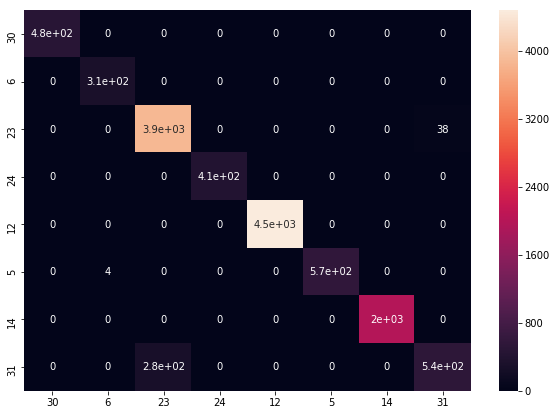

In [69]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = [x for x in d.keys()],
                  columns = [x for x in d.keys()])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

In [65]:
fr

,Action Label,Action,Index,Frames
0,23,using computer,30-1965,1935
1,30,putting on shoes/sucks,2337-2820,483
2,14,Drink water/bottle,2884-4871,1987
3,12,making tea,5359-9833,4474
4,23,using computer,9934-12539,2605
5,31,drinking coffee/tea,10966-11602,636
6,31,drinking coffee/tea,12545-12736,191
7,5,washing hands/face,13228-13803,575
8,6,drying hands/face,13815-14121,306
9,24,using cell,14272-14685,413


In [62]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(org_array_, X, normalize=True, sample_weight=None)

0.8547546531302876